# NumPy e Imagens

In [1]:
import numpy as np

# Importa o módulo de plotagem
import matplotlib.pyplot as plt

# Configura a matplotlib para operar interativamente no notebook.
# Para detalhes, execute: %matplotlib?
%matplotlib inline

# Configura o tamanho padrão da figura largura X altura, em polegadas
plt.rcParams['figure.figsize'] = (10, 8)

## Imagens como arrays NumPy

- Bibliotecas de processamento de imagens e visão computacional como OpenCV e scikit-image, em Python, utilizam **arrays NumPy** para representar imagens
- O atributo `shape` guarda as dimensões da imagem: linhas x colunas x canais

In [2]:
from skimage import data

O módulo `data` do pacote scikit-image (`skimage`) fornece funções que carregam imagens de exemplo. 

In [3]:
I = data.camera()
print I.dtype
print I.shape

uint8
(512, 512)


O que está armazenado no *pixel* [0, 0] (primeira coluna, primeira linha)?

In [4]:
I[0,0]

156

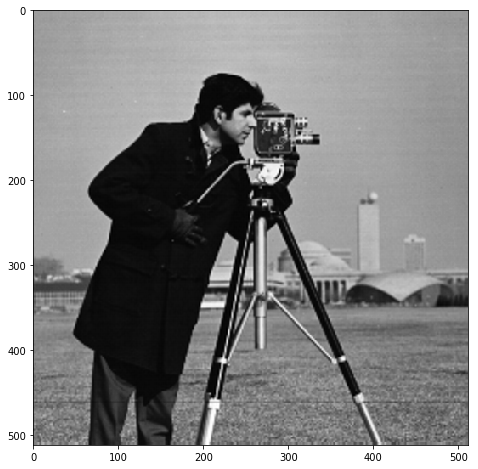

In [5]:
plt.imshow(I, cmap=plt.cm.gray)

### Imagens coloridas

- Uma imagem colorida pode ser representada por um array $M \times N \times 3$ do tipo `uint8`, contendo valores de 0 a 255 em cada canal (*unsigned integer - 8 bits*). Lembrando que 8 bits podem ser utilizados para representar $2^8 = 256$ valores. 

In [6]:
I = data.chelsea()

In [7]:
I.dtype

dtype('uint8')

In [8]:
I[2,3]

array([145, 121, 108], dtype=uint8)

Acima, vemos que temos uma imagem com 3 canais. Como as imagens são representadas usualmente em RGB, temos para o pixel (2, 3):

| Canal    | Valor |
|----------|-------|
| Vermelho |   145 |
| Verde    |   121 |
| Azul     |   108 |

A saída do comando acima mostra que o valor do pixel $(2, 3)$ é 145, 121, 108, representado na forma de um sub-array unidimensional com 3 valores. Para acesso direto ao valor de um canal, podemos utilizar, por exemplo, `I[2,3,1]`, que devolve o valor para o canal 1 (verde):

In [9]:
I[2, 3, 1]

121

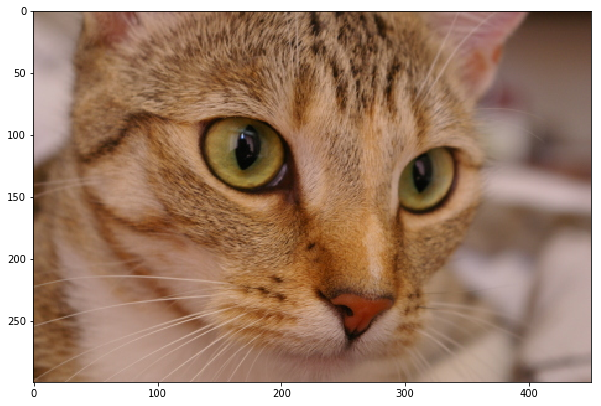

In [10]:
plt.imshow(I)

### Outros tipos de imagem

- Imagens não estão limitadas ao tipo *unsigned integer*
- Inteiros negativos ou números reais podem resultar de operadores como convoluções 
- Termografia
    - Os valores dos pixeis podem representar **temperaturas** em Celsius como números reais
- *Depth images*
    - Os valores dos pixeis representam **distâncias**

As imagens não estão limitadas a tipos inteiros não-negativos. Convoluções podem produzir números inteiros negativos ou valores reais. Por exemplo, um *núcleo de convolução* Sobel produz valores negativos que representam as derivadas.

In [11]:
from skimage import filters

In [12]:
I = data.camera()
sobel = filters.sobel(I)

In [13]:
sobel.dtype

dtype('float64')

In [14]:
# zeros-like produz uma imagem com as mesmas dimensões da imagem passada como primeiro parâmetro, 
# mas com 0 em todos os pixeis
border = np.zeros_like(sobel, dtype=np.bool)
border[sobel > 0.1] = True

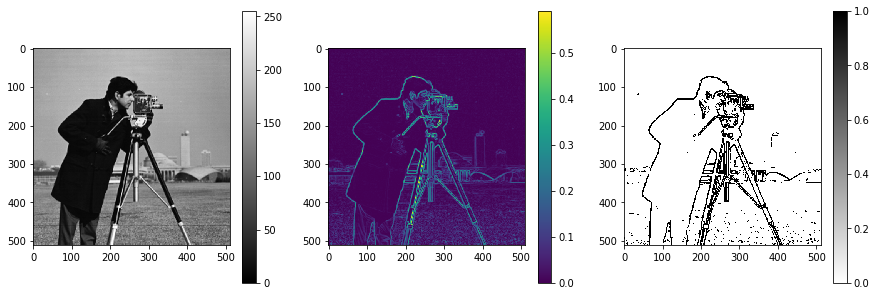

In [15]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(I, cmap=plt.cm.gray)
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(sobel, cmap=plt.cm.viridis)
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(border, cmap=plt.cm.binary)
plt.colorbar()

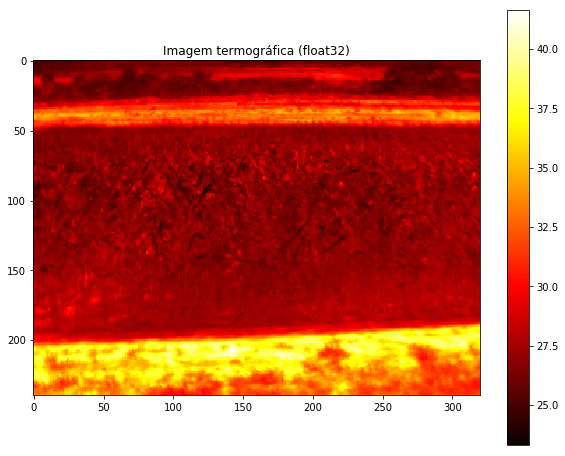

In [16]:
thermo = np.loadtxt('data/thermo-maize.csv', delimiter=';')
plt.title(u'Imagem termográfica (float32)')
plt.imshow(thermo, cmap=plt.cm.hot)
plt.colorbar()

## Slicing

Como as imagens são arrays NumPy, podemos utilizar *slicing* para obter partes das imagens:

In [17]:
A = I[50:200, 150:300]
A

array([[174, 174, 174, ..., 184, 185, 182],
       [176, 174, 173, ..., 187, 187, 184],
       [176, 175, 174, ..., 187, 187, 184],
       ..., 
       [ 12,  12,  13, ...,  10,  11,  11],
       [ 11,  11,  12, ...,  10,  11,  13],
       [ 12,  12,  12, ...,  11,  13,  16]], dtype=uint8)

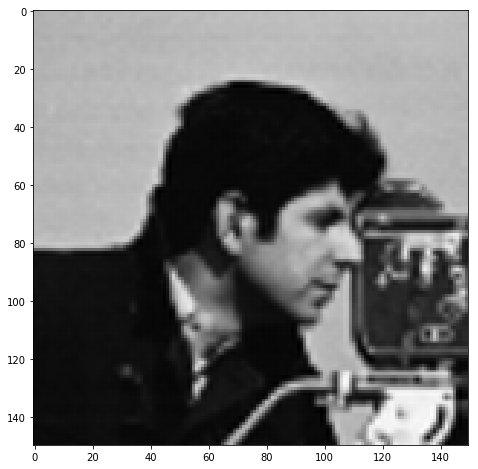

In [18]:
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')

## Exemplo - *Whitening*

- Problema: imagens com *baixo contraste*
  - Ambiente com pouca luz
  - Problemas com o ganho do sensor

Fatores como a intensidade da luz ambiente ou o ganho do sensor da câmera produzem variações no contraste da imagem. Esses fatores podem ser compensados por *whitening*, uma operação nos pixeis que normaliza a intensidade, produzindo uma imagem com média zero e variância unitária. O exemplo abaixo mostra que o *whitening* pode ser realizado eficientemente por operações vetoriais, mas mantendo a mesma simplicidade de sua definição matemática.

In [19]:
from skimage import io

I = io.imread('data/girl.jpg', as_grey=True)

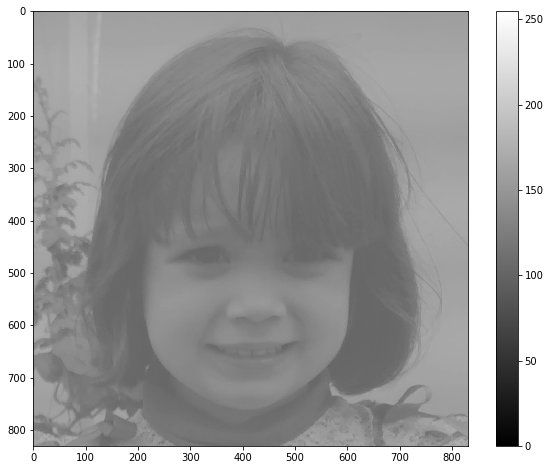

In [20]:
plt.imshow(I, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.colorbar()

- Solução: **whitening** produz uma image com média **zero** e variância unitária
\begin{equation}
  W_I[i,j] = \frac{I[i,j] - \mu_I}{\sigma_I}.
\end{equation}

- NumPy pode realizar esta operação de modo eficiente
  - *Vectorized operation*

In [21]:
mu_I = np.mean(I)
sigma_I = np.std(I)
W_I = (I - mu_I)/sigma_I

NumPy é capaz de realizar operações entre um array e um número (um *escalar*). No código acima, todos os elementos são subtraídos pela média, $\mu_I$ , e o resultado é dividido pela variância, $\sigma_I$. Abaixo, os pixeis são convertidos para uma representação de 8 bits (0 - 255):

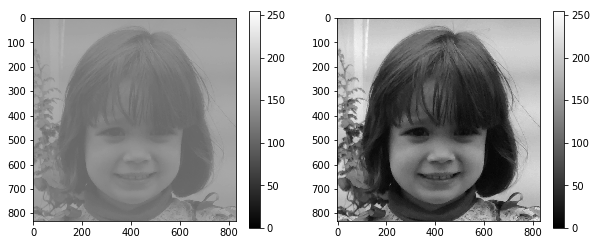

In [22]:
delta_W = W_I.max() - W_I.min()
W_uint8 = np.array(255./delta_W * (W_I - W_I.min()), dtype=np.uint8)

fig = plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(W_uint8, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.colorbar()